# Introduction to Regression with Neural Networks in TensorFlow

🟢 There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [3]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.9.1


## Regression analysis
**Source**: https://en.wikipedia.org/wiki/Regression_analysis

![Regression Analysis](https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg)

In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome' or 'response' variable, or a 'label' in machine learning parlance) and one or more independent variables (often called 'predictors', 'covariates', 'explanatory variables' or 'features').

## Creating data to view and fit

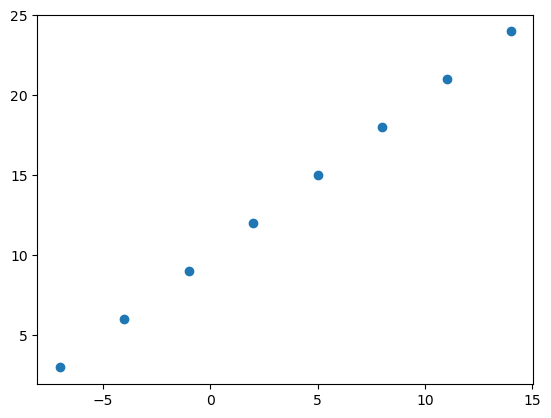

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Create features (Indepent variables)
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (Dependent variables)
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [5]:
# We created the definition above with a relationship 
# between X and y as the function X + 10:
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [6]:
# Validating if y == X + 10
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [7]:
# Create a fast demo tensor for our housing price prediction 
# problem # to understand how input and output shape is
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

2022-10-09 20:32:57.601965: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

⚠️ If some error like Input 0 of layer "dense" is incompatible with the layer....

This happens because model.fit() no longer automatically upscales inputs from shape (batch_size, ) to (batch_size, 1).

OLD
model.fit(X, y, epochs=5)

NEW
model.fit( tf.expand_dims(X, axis=-1), y, epochs=5)

In [9]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

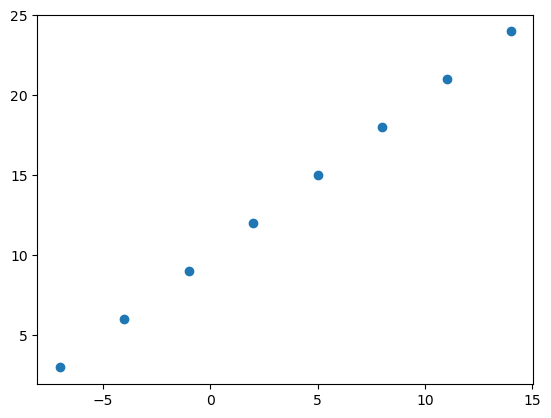

In [11]:
plt.scatter(X, y);

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compile a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(1)
# ])
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
# Note: Loss MAE is used for comparisons of predicted versus observed

model.compile(
    loss=tf.keras.losses.mae, # mae is short for mean absolute error
    optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
    metrics=["mae"]
)

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 174ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 2ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 10.9748 - mae: 10.9748


In [13]:
# Check out X an y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [14]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 55ms/step


array([[12.716021]], dtype=float32)

### Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increate the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **ephocs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [15]:
# Let's rebuild the model

# 1. Create a model (again)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 137ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 2m

In [16]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [17]:
# Let's see if our model's prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 34ms/step


array([[29.739855]], dtype=float32)

In [18]:
# Let's see if we can make another change to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2 . Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 171ms/step - loss: 11.7682 - mae: 11.7682
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 11.0963 - mae: 11.0963
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 10.4150 - mae: 10.4150
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 9.7212 - mae: 9.7212
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 9.0104 - mae: 9.0104
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 8.2778 - mae: 8.2778
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 7.5198 - mae: 7.5198
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 6.9648 - mae: 6.9648
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 7.0672 - mae: 7.0672
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 7.3315 - mae: 7.3315
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss:

In [19]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [20]:
model.predict([17.0])

1/1 [==============================] - 0s 45ms/step


array([[26.583532]], dtype=float32)

### ⭐️ Common ways to improve a deep model
* Adding layers
* Increase the number of hidden units
* Change the activation functions
* Change the optimization function
* Change the learning rate
* Fitting on more data
* Fitting for longer (epochs)

## Evaluating a model

**🟢 When it comes to evaluation... there are 3 words you should memorize:**
"Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - What does model look like?
* The training of model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [21]:
# Make a bigger dataset
X = tf.range(-100, 100, 4) # Numbers between -100 and 100 stepped 4
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [22]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

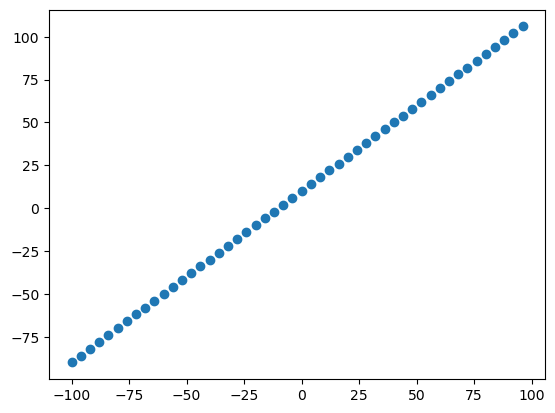

In [23]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets:
* **Training set** - the model learns from this data, which is tipically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is tipically 10-15% of the total data available.
* **Test set** - the model get evaluated on this data to test what is has learned, this set is tipically 10-15% of the total data available.


#### Similar to exam
📖 **Course materials** (training set) ➡️ 📝 **Practice exam** (validation set) ➡️ 📝 **Final exam** (test set)

#### ⚙️ Generalization
The ability for a machine learning model to perform well on data it hasn't seen before.

In [24]:
# Check the length of how many samples we have
len(X)

50

In [25]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test  = X[40:] # last 10 samples are testing samples (20% of the data)
y_test  = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again!

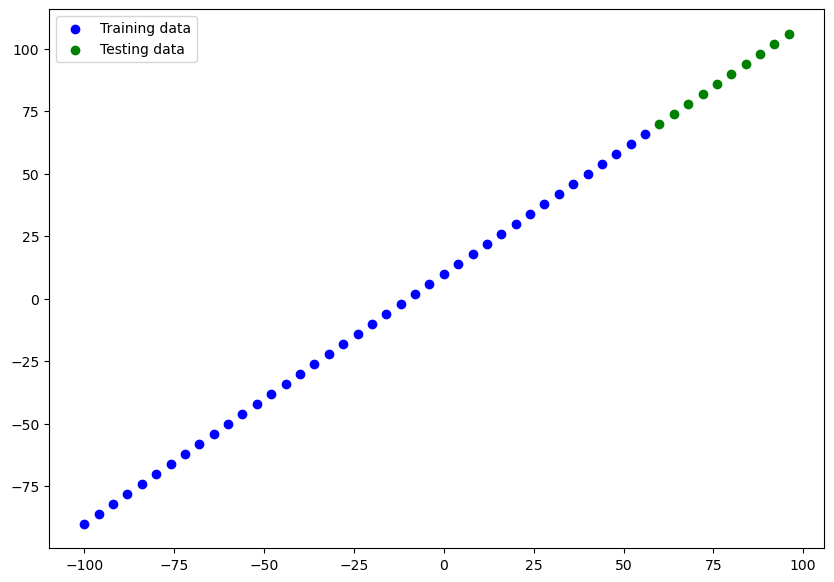

In [26]:
plt.figure(figsize=(10, 7))

# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")

# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")

# Show a legend
plt.legend(); # Use this semicolon at and to set end

In [27]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# # 3. Fit the model
# model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

### Visualizing the model

In [28]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [63]:
# Let's create a model which builds automatically by defining the 
# input_shape argument in the first layer

tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


In [64]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total of parameters in the model
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when your bring in already learn patterns or parameters from other models during **transfer learning**).

#### 🟢 Note: Dense means a fully connected neurons layer
![Fully connected layers](https://www.researchgate.net/profile/Alex-Kost-2/publication/336607800/figure/fig4/AS:814973764767744@1571316295028/Visualization-of-a-fully-connected-layer-Taken-from-Hollemans-72.ppm)

In [65]:
# Let's fit our model to the training data
model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100, verbose=0)

In [66]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


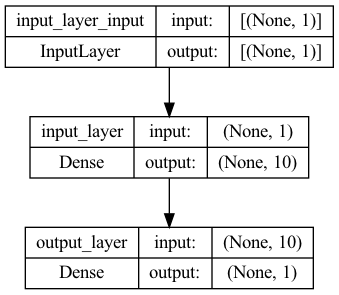

In [67]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions)

In [70]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

# In ideal execution y_pred has the same values of y_test
X_test, y_pred, y_test

1/1 [==============================] - 0s 13ms/step


(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 array([[ 70.552185],
        [ 75.13991 ],
        [ 79.72764 ],
        [ 84.315346],
        [ 88.90308 ],
        [ 93.49081 ],
        [ 98.07852 ],
        [102.666245],
        [107.253975],
        [111.84169 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

🔑 **Note:** Below we will do a plot for predictions. If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to create a function 

In [75]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=y_pred):
    """
    Plots training data, test data and compares predictions to ground truth labels.
    """
    plt.figure(figsize=(10, 7))
    
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    
    #Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    
    #Plot model's predictions in red
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    
    # Show the legent
    plt.legend();



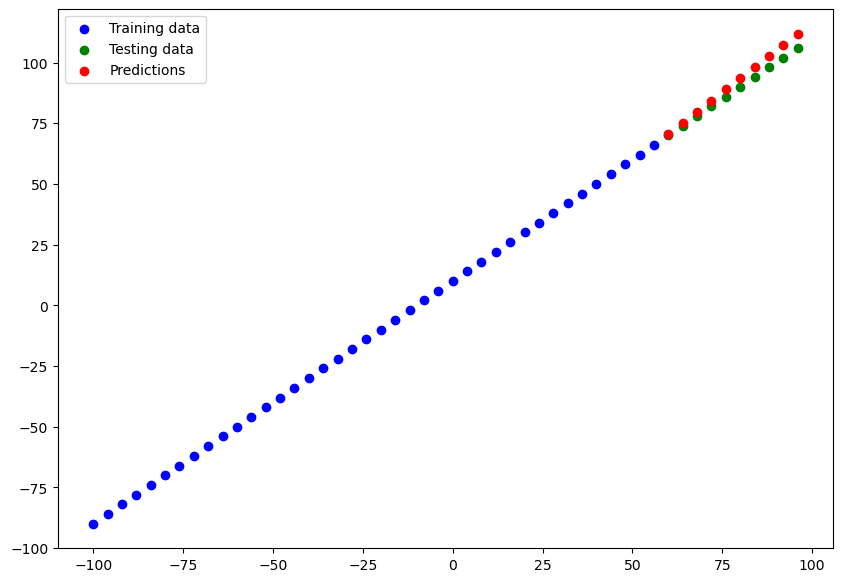

In [77]:
# plot_predictions()
plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error "square the average errors"

In [78]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 86ms/step - loss: 3.1969 - mae: 3.1969


[3.1969406604766846, 3.1969406604766846]

In [88]:
# Calculate the mean absolute error

mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558252 , 14.1160555, 11.708944 , 10.336931 , 10.       ,
       10.698161 , 12.447113 , 15.332995 , 19.253975 , 23.84169  ],
      dtype=float32)>

In [94]:
y_test, tf.constant(y_pred)

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 <tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[ 70.552185],
        [ 75.13991 ],
        [ 79.72764 ],
        [ 84.315346],
        [ 88.90308 ],
        [ 93.49081 ],
        [ 98.07852 ],
        [102.666245],
        [107.253975],
        [111.84169 ]], dtype=float32)>)

In [95]:
# Calculate the mean absolute error 
# keeping the same dimensions y_true and y_pred
# Look that result is the same result of model.evaluate

mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>

In [97]:
# Calculate the mean square error

mse = tf.metrics.mean_squared_error(y_true=y_test, 
                                     y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070127>

In [109]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modeling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

#### Build `model_1`
*  1 dense layer, trained for 100 epochs

In [102]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, name="input_layer")
], name="model_1")

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])


# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100, verbose=0);

In [104]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


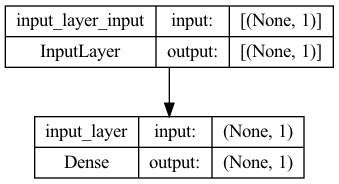

In [105]:
plot_model(model=model_1, show_shapes=True)

1/1 [==============================] - 0s 28ms/step


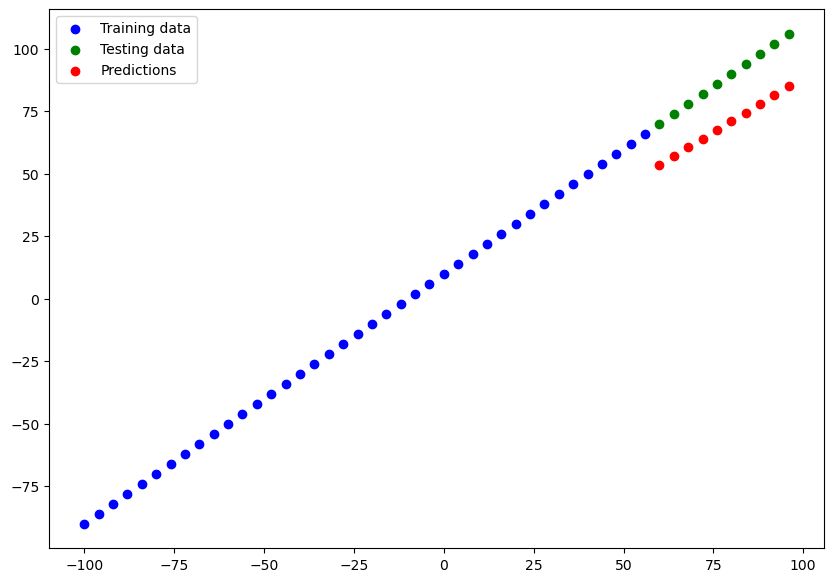

In [106]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [110]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

As above metrics results:

* **MAE:** each graph dot is on average 18.745327 far away from where it should be.
* **MSE:** each graph dot is on average 353.57336 far away from where it should be.

#### Build `model_2`
*  2 dense layers, trained for 100 epochs

In [161]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_2")

#2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

#3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100, verbose=0)

In [162]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 output_layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


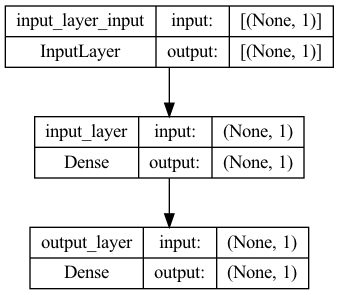

In [163]:
plot_model(model_2, show_shapes=True)

1/1 [==============================] - 0s 32ms/step


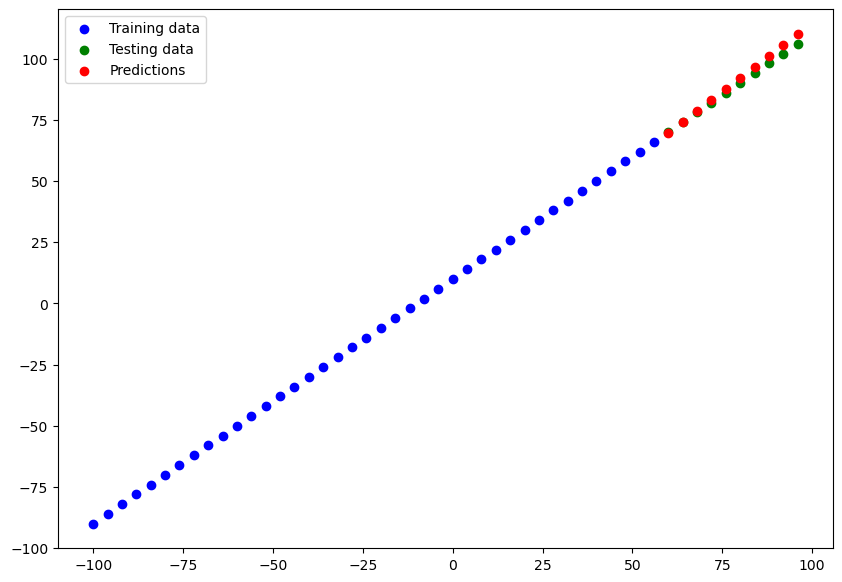

In [164]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [166]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=1.9097328>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.45877>)

As above metrics results:

* **MAE:** each graph dot is on average 1.9097328 far away from where it should be.
* **MSE:** each graph dot is on average 5.45877 far away from where it should be.

#### Build `model_3`
*  2 dense layers, trained for 500 epochs

In [193]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_3")

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=500, verbose=0)

In [194]:
model_3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 output_layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


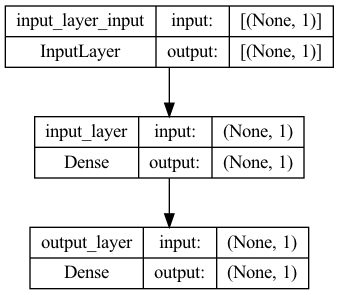

In [195]:
plot_model(model_3, show_shapes=True)

1/1 [==============================] - 0s 32ms/step


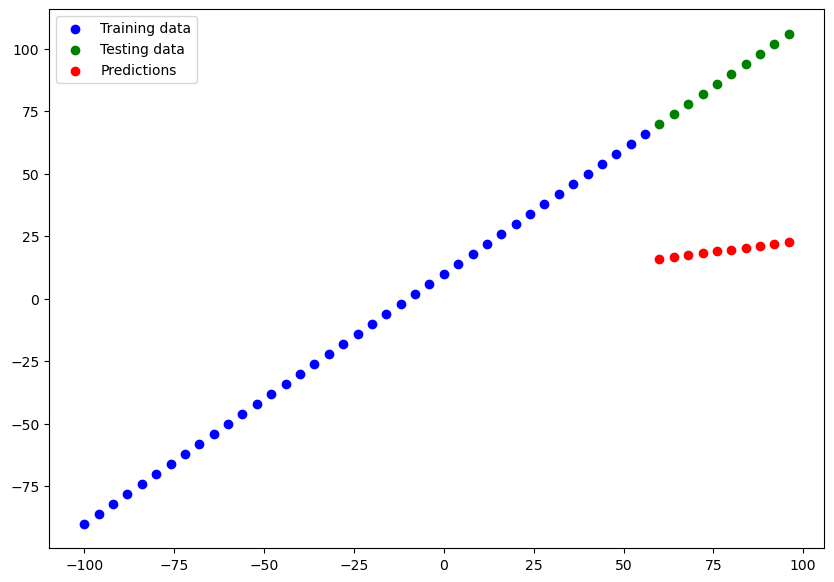

In [196]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [198]:
# Calculate the model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.68784>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4804.469>)

As above metrics results:

* **MAE:** each graph dot is on average 68.68784 far away from where it should be.
* **MSE:** each graph dot is on average 4804.469 far away from where it should be.

#### Note based on last sections

🔑 **Note:** You want to start with small experiments (samll models) and make sure they work and then increase their scale when necessary.

## Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [199]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]


all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])

all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,1.909733,5.458770
2,model_3,68.687843,4804.469238


#### Model 2 performed the best
2 dense layers, trained for 100 epochs

In [200]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 output_layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


🔑 **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work.

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

📖 **Reource:** As you build more models, you'll want to look into using:

* TensorBoard (https://www.tensorflow.org/tensorboard) - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights & Biases (https://wandb.ai/site) - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving our models

Saving our models allows us to use them outside Jupyter Notebook, Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format - Hierarchical Data Format - Designed to store and organize large amount of data.

In [202]:
# Save model using the SavedModel format
!mkdir -p saved_model
model_2.save('saved_model/model_2')

INFO:tensorflow:Assets written to: saved_model/model_2/assets


In [203]:
# Save model using the HDF5 format
!mkdir -p hdf5

# The '.h5' extension indicates that the model should be saved to HDF5
model_2.save('hdf5/model_2.h5')

## Loading in a saved model

In [210]:
# Load in a model using the Saved Model format
loaded_SavedModel_format = tf.keras.models.load_model("saved_model/model_2")
loaded_SavedModel_format.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 output_layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [211]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)

model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 25ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [212]:
# Load in a model using the .h5 format
loaded_h5_format = tf.keras.models.load_model("hdf5/model_2.h5")
loaded_h5_format.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 output_layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [214]:
# Compare model_2 predictions with HDF5 format model predictions
model_2_preds = model_2.predict(X_test)
loaded_hdf5_format_preds = loaded_h5_format.predict(X_test)

model_2_preds == loaded_hdf5_format_preds

1/1 [==============================] - 0s 13ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## A larger example

### Using a kaggle.com dataset as example - Medical Cost Personal Datasets
* Details: https://www.kaggle.com/datasets/mirichoi0218/insurance
* Github: https://github.com/stedy/Machine-Learning-with-R-datasets
* Raw data: https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv


Use Linear Regression to discover medical charges based on age, sex, bmi, children, smoker and region.

* **Dependent variable (label):** charges
* **Independent variables (features):** age, sex, bmi, children, smoker and region

## Reviewing Regression Analysis Concept
**Source**: https://en.wikipedia.org/wiki/Regression_analysis

![Regression Analysis](https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg)

In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome' or 'response' variable, or a 'label' in machine learning parlance) and one or more independent variables (often called 'predictors', 'covariates', 'explanatory variables' or 'features').

In [227]:
# Import required libraries

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [228]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Transform un-numerical columns to numerical columns to be processsed using one-hot encode
One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction

![One-hot encoding example](https://miro.medium.com/max/4800/0*T5jaa2othYfXZX9W.)

In [233]:
# Using get_dummies function to convert 
# categorial variable into dummy/indicator variables

insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [239]:
# Create X & y values (features and labels)

# The X (independent variables) will be every column of DataFrame except charges
X = insurance_one_hot.drop("charges", axis=1)

# The y (dependent or label) is charges column
y = insurance_one_hot["charges"]

In [240]:
# View X (independent variables)
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [241]:
# View y (label)
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [245]:
# Create training and test sets

# Split dataset in random set to train using sklearn
#  Open terminal for environment and rul:
#      conda install -c conda-forge scikit-learn
from sklearn.model_selection import train_test_split

# Separate 20% (0.2) for test and 80% to train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [276]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create the model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model")

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100, verbose=0)

In [277]:
# View model summary
insurance_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                120       
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


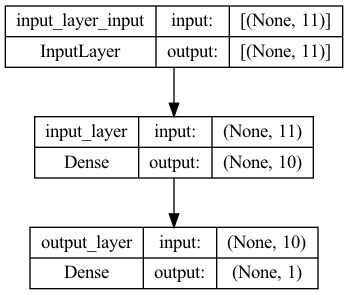

In [286]:
# View model plot
from tensorflow.keras.utils import plot_model

plot_model(model=insurance_model, show_shapes=True)

In [279]:
# Check the results of the insurance model on the test data (loss value)
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 766us/step - loss: 7023.3281 - mae: 7023.3281


[7023.328125, 7023.328125]

In [280]:
# Check the average and median values to know how far the mae is wrong in average
y_train.median(), y_train.mean()

# If the model isn't performing too well... let's try and improve it!

(9575.4421, 13346.089736364489)

### Improve the model

To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units (100 neurons). This amount of neurons requires to use Adam instead of SGD in optimizer
2. Train for longer (200 epochs)

In [315]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, name="Hidden_layer_1"),
    tf.keras.layers.Dense(10, name="Hidden_layer_2"),
    tf.keras.layers.Dense(1, name="Output_layer")
], name="insurance_model_2")

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# Fit the model
history_training_model_2 = insurance_model_2.fit(X_train, y_train, epochs=200, verbose=0)

In [316]:
insurance_model_2.summary()

Model: "insurance_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer_1 (Dense)      (None, 100)               1200      
                                                                 
 Hidden_layer_2 (Dense)      (None, 10)                1010      
                                                                 
 Output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


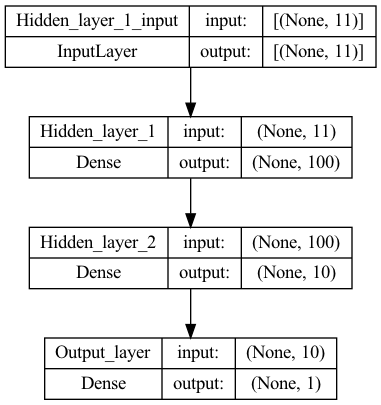

In [317]:
plot_model(model=insurance_model_2, show_shapes=True)

In [338]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 839us/step - loss: 3488.7861 - mae: 3488.7861


[3488.7861328125, 3488.7861328125]

Text(0.5, 0, 'epochs')

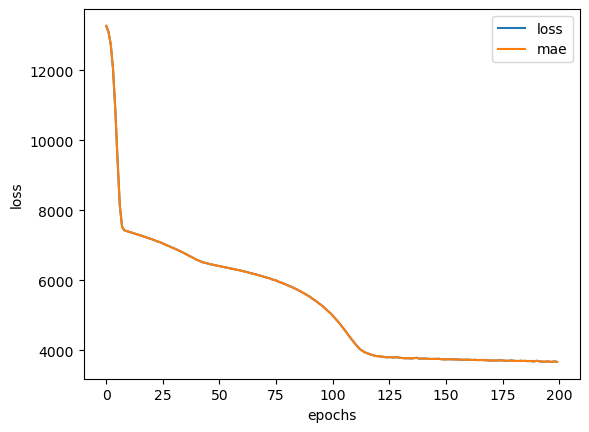

In [339]:
# Plot history (also known as a loss curve or training curve)
pd.DataFrame(history_training_model_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

🤔 **Question:** How long should you train for?

It depends. Really... it depends on the problem you're working on. However, many people have asked this question before... so Tensorflow has a solution! It's called the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

## Preprocessing data (normalization and standadization)

In terms of scaling values, neural networkds tend to prefer normalization. Normalization is to change the values of numeric columns in the dataset to a commong scale, without distorting differences in the range of values.

#### Scaling type
* **Scale (also referred to as normalisation):** Convert all values to between 0 and 1 whilst preserving the original distribution. Scikit-Learn function: **MinMaxScaler**. **When to Use:** Use as default scaler with neural networks.
* **Standarization:** Removes the mean and divides each value by the standard deviation. Scikit-Learn function: **StandardScale**. **When to Use:** Transform a feature to have close to normal distribution (caution: this reduces the effect of outliers).

If you're not sure on which to use, you could try both and see which performs better.

<AxesSubplot:ylabel='Frequency'>

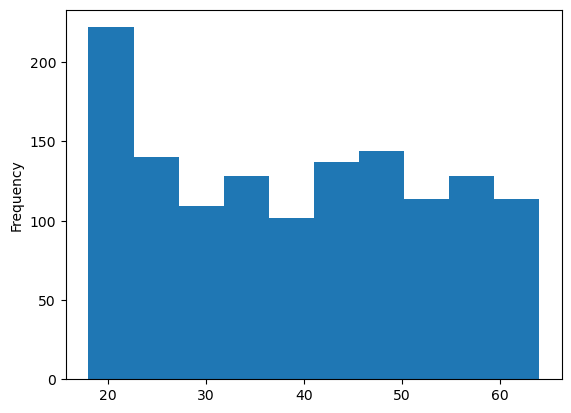

In [352]:
# Example of columns data distortion is when comparing different 
# columns like age, bmi and children as shown in histogram plot
X["age"].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

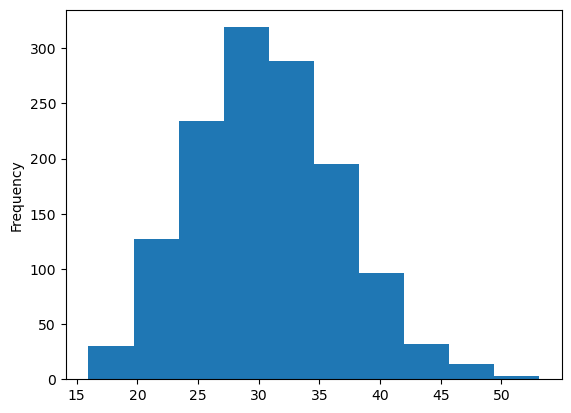

In [351]:
X["bmi"].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

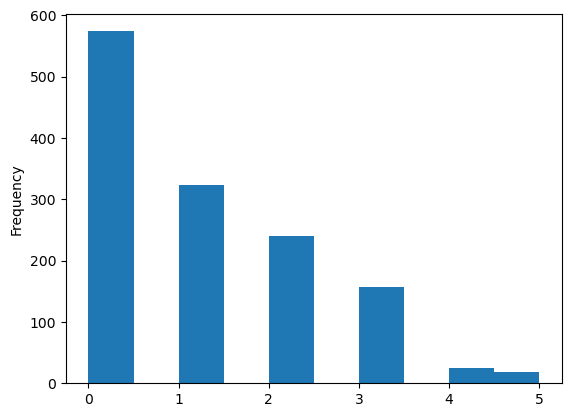

In [353]:
X["children"].plot(kind="hist")

#### To prepare our data, we can borrow a few classes from Scikit-Learn.

In [358]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
#  Open terminal for environment and rul:
#      conda install -c conda-forge scikit-learn


# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # thrn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y values

# The X (independent variables) will be every column of DataFrame except charges
X = insurance.drop("charges", axis=1)

# The y (dependent or label) is charges column
y = insurance["charges"]


# Split dataset in random set to train using sklearn
# Separate 20% (0.2) for test and 80% to train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [361]:
# What does our data look like now?
X_train.loc[0], X_train_normal[0]

(age                19
 sex            female
 bmi              27.9
 children            0
 smoker            yes
 region      southwest
 Name: 0, dtype: object,
 array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]))

In [363]:
# What about the shapes - We can see that original dataset has 6 columns,
# the normalized has 11 columns
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

### Our data has been normalized and one hot encoded.
#### Now let's build a neural network model on it and see how it goes.

In [ ]:
# Build a neural network model to fit on our normalized data
